# inmporting requiered dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing dataset

In [2]:
df=pd.read_csv(r'C:/Users/Admin/Downloads/final.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [4]:
# checking null values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [5]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [6]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [7]:
# unknwn data is covert to blue-collar
df['job'] = df['job'].str.replace("unknown","blue-collar")

In [8]:
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [9]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [10]:
df['education_qual'] = df['education_qual'].str.replace("unknown","secondary")

In [11]:
df['education_qual'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education_qual, dtype: int64

In [12]:
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [13]:
df['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [14]:
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [15]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [16]:
df['target'] = df['y'].map({"no":0,"yes":1})

In [17]:
df['target']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target, Length: 45211, dtype: int64

In [18]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no,0


In [19]:
# drop unwanted columns 'y'
df.drop("y",axis = 1,inplace = True)

<AxesSubplot:xlabel='job', ylabel='target'>

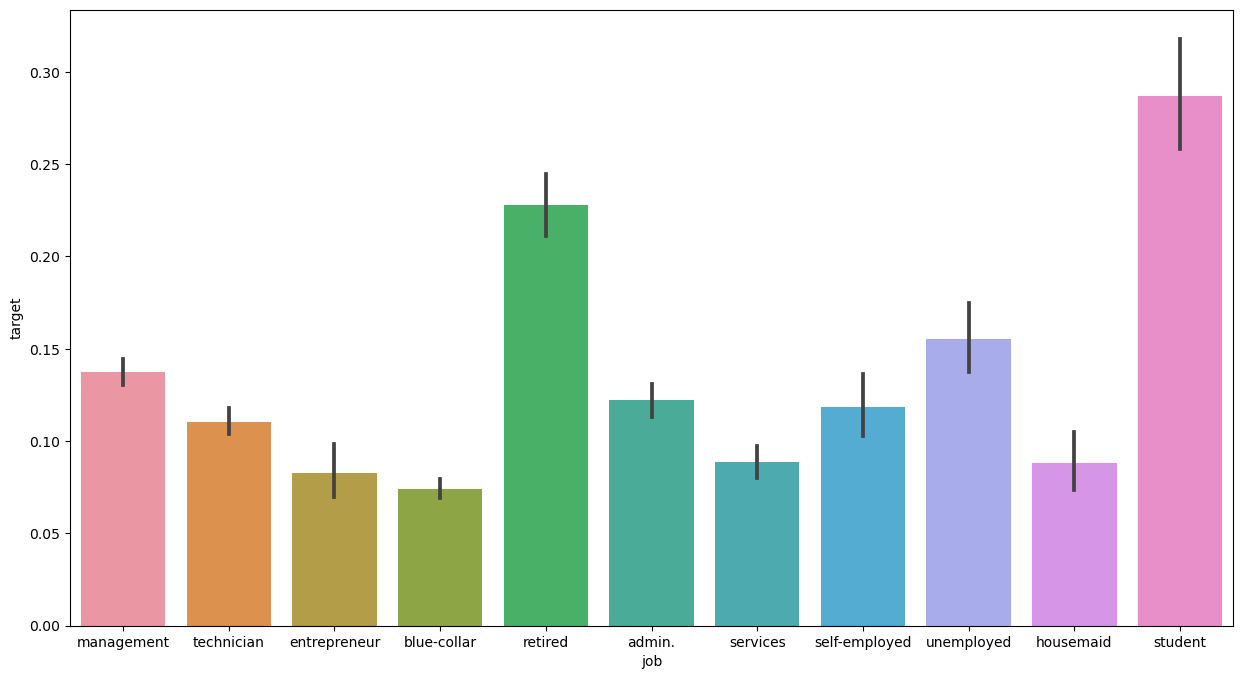

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(x='job',y='target',data=df)

In [21]:
df.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [22]:
def segment_day(day):
    day==int(day)
    if day >=1 and day<=7:
        return 'first week'
    elif day>8 and day<=14:
        return 'second week'
    elif day>=15 and day <=21:
        return 'third week'
    elif day >=22 and day<=28:
        return 'fourth week'
    else:
        return 'others'
df['day'] =df['day'].apply(segment_day) 

In [23]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,management,married,tertiary,unknown,first week,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,first week,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,first week,may,76,1,unknown,0
3,47,blue-collar,married,secondary,unknown,first week,may,92,1,unknown,0
4,33,blue-collar,single,secondary,unknown,first week,may,198,1,unknown,0


In [24]:
df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [25]:
def segment_month(mon):
    if mon in ['jan','feb','mar']:
        return 'Fourth Quarter'
    if mon in ['apl','may','jun']:
        return 'First Quarter'
    if mon in ['jul','aug','sep']:
        return 'Second Quarter'
    else:
        return 'Thirth Quarter'
    
df['mon'] = df['mon'].apply(segment_month)

In [26]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,management,married,tertiary,unknown,first week,First Quarter,261,1,unknown,0
1,44,technician,single,secondary,unknown,first week,First Quarter,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,first week,First Quarter,76,1,unknown,0
3,47,blue-collar,married,secondary,unknown,first week,First Quarter,92,1,unknown,0
4,33,blue-collar,single,secondary,unknown,first week,First Quarter,198,1,unknown,0


<AxesSubplot:xlabel='mon', ylabel='target'>

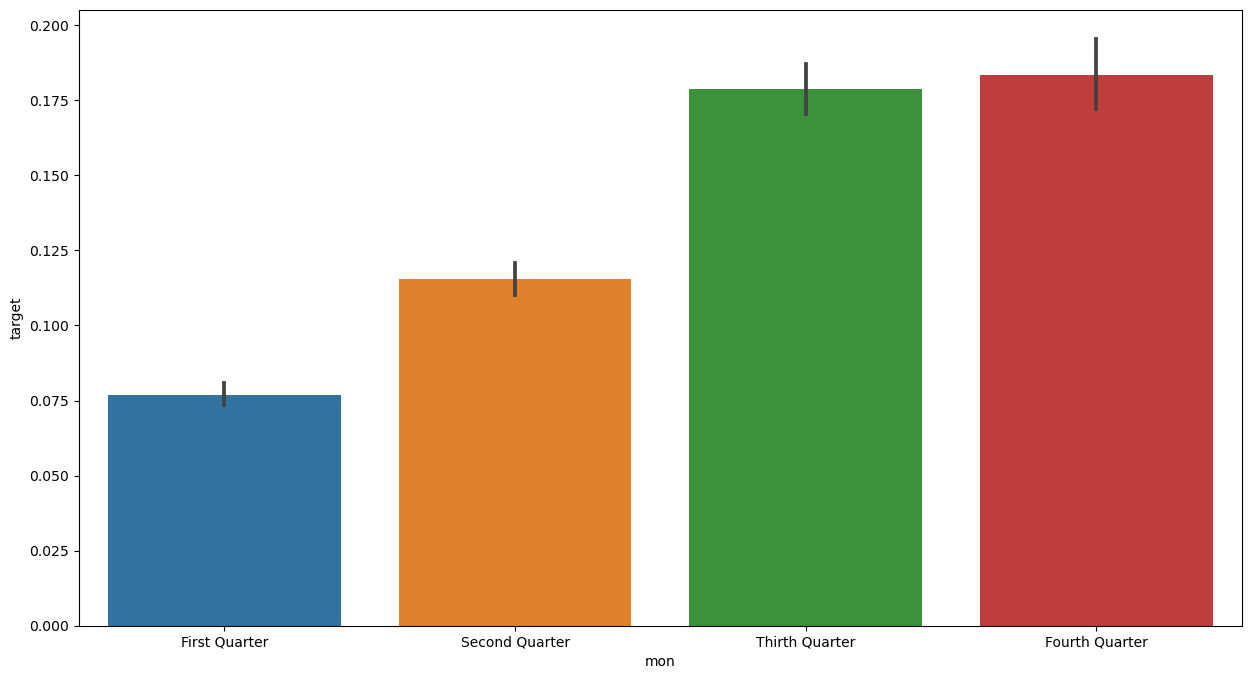

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(x='mon',y='target',data=df)

<AxesSubplot:xlabel='marital', ylabel='target'>

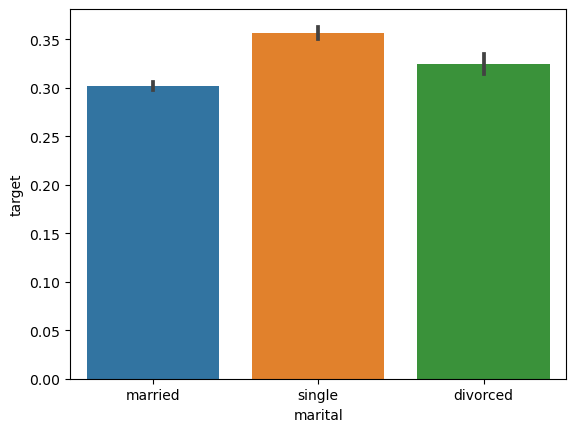

In [28]:
sns.barplot(y='target',x='marital',data=df,estimator=np.std)

<AxesSubplot:xlabel='education_qual', ylabel='target'>

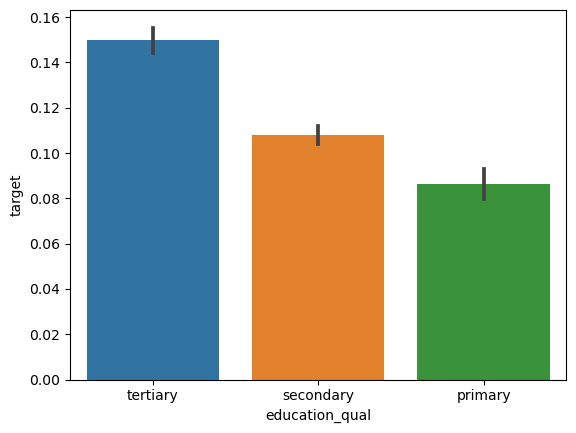

In [29]:
sns.barplot(x='education_qual',y='target',data=df)

<AxesSubplot:xlabel='marital', ylabel='target'>

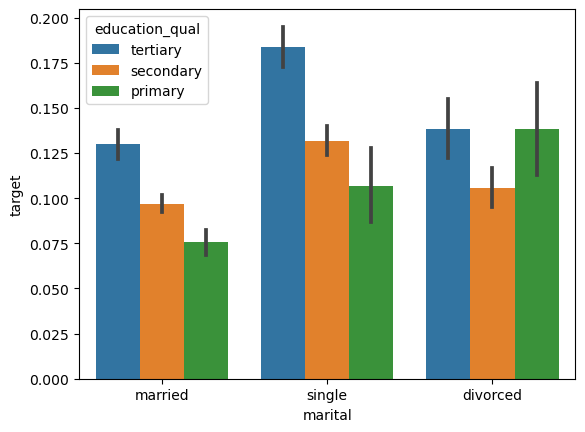

In [30]:
sns.barplot(x='marital',y='target',data=df,hue='education_qual')

<AxesSubplot:xlabel='prev_outcome', ylabel='target'>

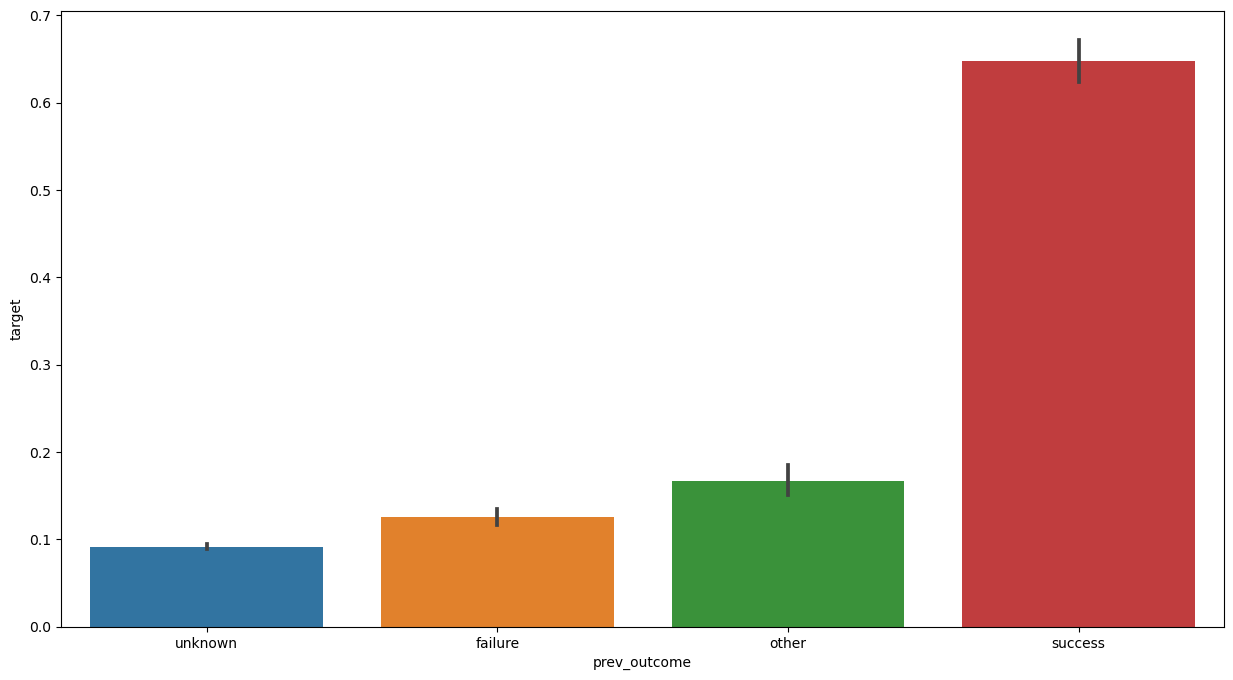

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(x='prev_outcome',y='target',data=df)


<AxesSubplot:xlabel='day', ylabel='mon'>

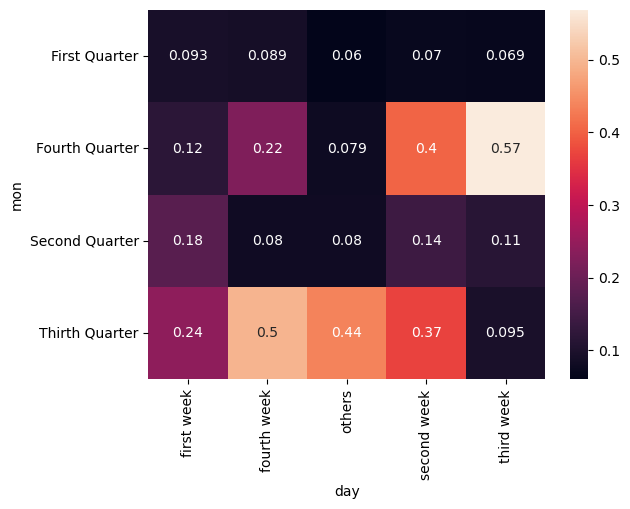

In [32]:
dfheat=df.pivot_table(values ='target',index='mon',columns='day')
sns.heatmap(dfheat,annot =True,fmt='.2g')

In [33]:
df.groupby('target').mean()

,age,dur,num_calls
target,,,
0,40.838986,221.182806,2.846350
1,41.670070,537.294574,2.141047


# label encoding


In [34]:
cat_cols = [col for col in df.columns if df[col].dtype =='object']
cat_cols
df[cat_cols]

,job,marital,education_qual,call_type,day,mon,prev_outcome
0,management,married,tertiary,unknown,first week,First Quarter,unknown
1,technician,single,secondary,unknown,first week,First Quarter,unknown
2,entrepreneur,married,secondary,unknown,first week,First Quarter,unknown
3,blue-collar,married,secondary,unknown,first week,First Quarter,unknown
4,blue-collar,single,secondary,unknown,first week,First Quarter,unknown
...,...,...,...,...,...,...,...
45206,technician,married,tertiary,cellular,third week,Thirth Quarter,unknown
45207,retired,divorced,primary,cellular,third week,Thirth Quarter,unknown
45208,retired,married,secondary,cellular,third week,Thirth Quarter,success
45209,blue-collar,married,secondary,telephone,third week,Thirth Quarter,unknown


In [35]:
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [36]:
df['job'] = df['job'].map({'blue-collar':0,'management':1,'technician':2,'admin':3,'services':4,'retired':5,'self-employed':6,'entrepreneur':7,'unemployed':8,'housemaid':9,'student':10})

df['marital'] = df['marital'].map({'married':0,'single':1,'divorced':2})

df['education_qual'] = df['education_qual'].map({'secondary':0,'tertiary':1,'primary':2})

df['call_type'] = df['call_type'].map({'cellular':0,'unknown':1,'telephone':2})

df['day'] = df['day'].map({'third week':0,'first week':1,'second week':2,'fourth week':3,'others':4})

df['mon'] = df['mon'].map({'First Quarter':0,'Second Quarter':1,'Thirth Quarter':2,'Fourth Quarter':3})

df['prev_outcome'] = df['prev_outcome'].map({'unknown':0,'failure':1,'other':2,'success':3})

In [37]:
df['prev_outcome'].value_counts()

0    36959
1     4901
2     1840
3     1511
Name: prev_outcome, dtype: int64

In [38]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,1.0,0,1,1,1,0,261,1,0,0
1,44,2.0,1,0,1,1,0,151,1,0,0
2,33,7.0,0,0,1,1,0,76,1,0,0
3,47,0.0,0,0,1,1,0,92,1,0,0
4,33,0.0,1,0,1,1,0,198,1,0,0


In [39]:
df.groupby('target').mean()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
target,,,,,,,,,,
0,40.838986,2.519021,0.502179,0.596789,0.438906,1.570763,0.90509,221.182806,2.846350,0.224137
1,41.670070,3.071490,0.596710,0.600870,0.247684,1.668557,1.30138,537.294574,2.141047,0.787673


<AxesSubplot:>

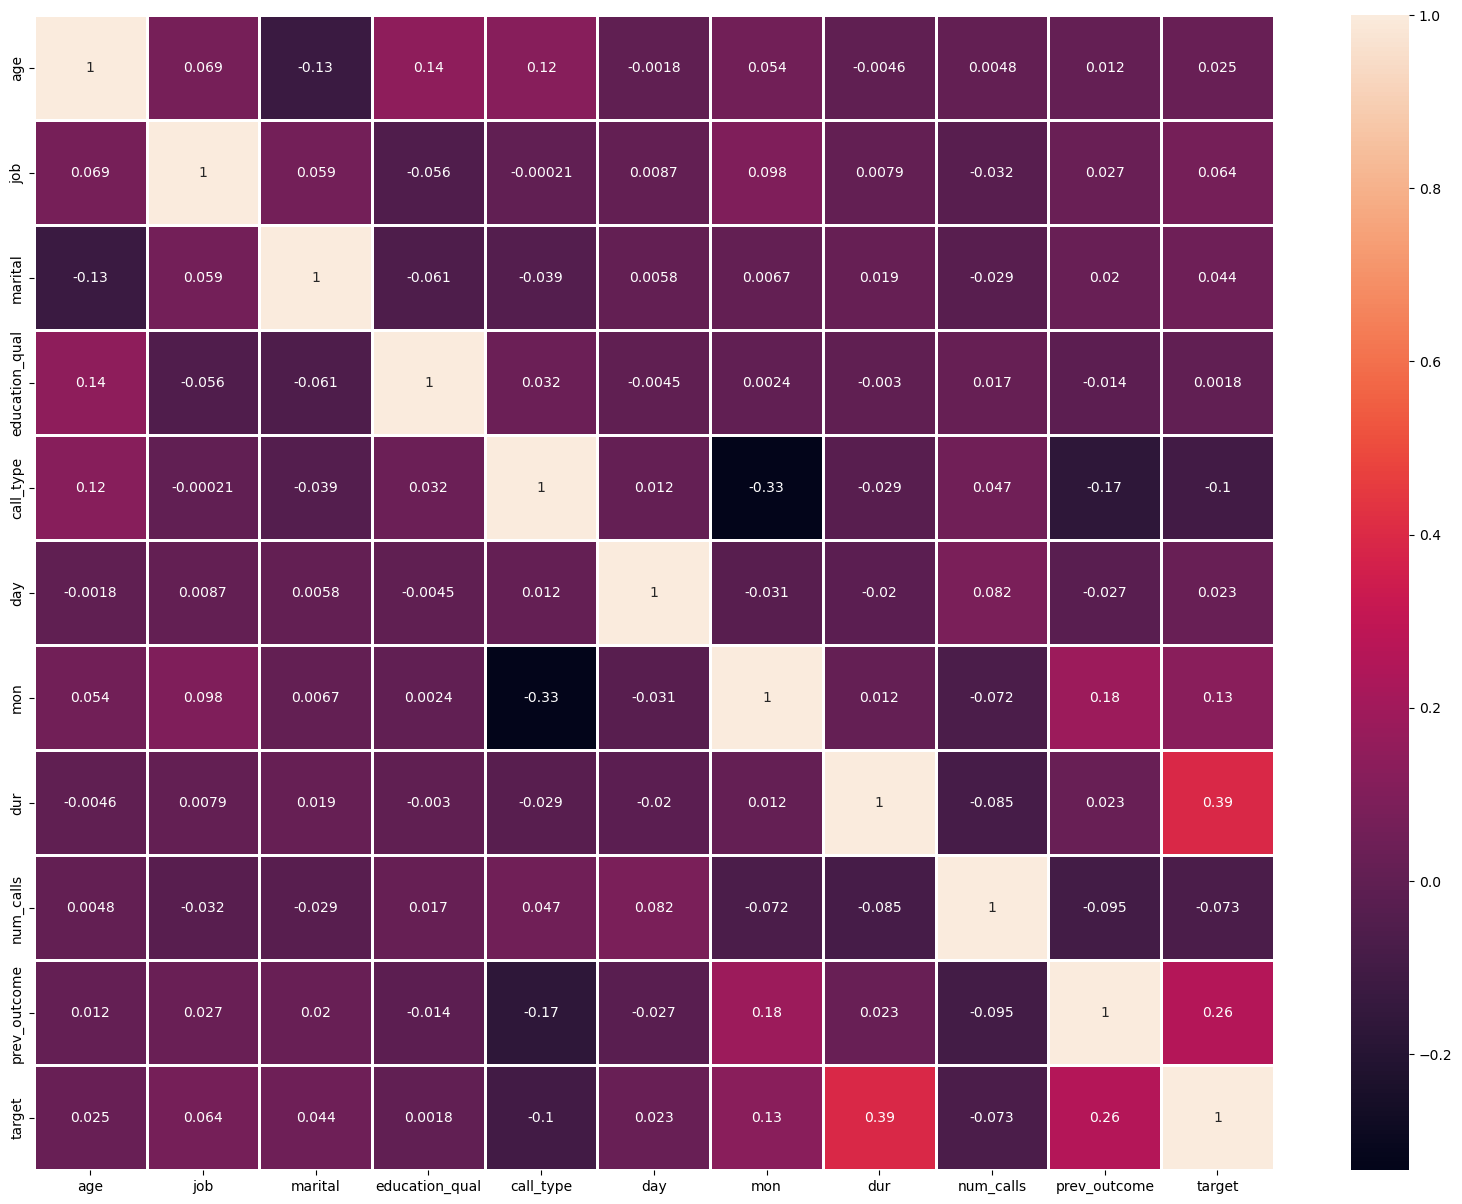

In [40]:
%matplotlib inline
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot =True)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
df.dropna()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,1.0,0,1,1,1,0,261,1,0,0
1,44,2.0,1,0,1,1,0,151,1,0,0
2,33,7.0,0,0,1,1,0,76,1,0,0
3,47,0.0,0,0,1,1,0,92,1,0,0
4,33,0.0,1,0,1,1,0,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2.0,0,1,0,0,2,977,3,0,1
45207,71,5.0,2,2,0,0,2,456,2,0,1
45208,72,5.0,0,0,0,0,2,1127,5,3,1
45209,57,0.0,0,0,2,0,2,508,4,0,0


In [43]:
x = df.drop(['target'],axis=1)
y = df['target']

# checking target data balancing or unbalancing data

<AxesSubplot:>

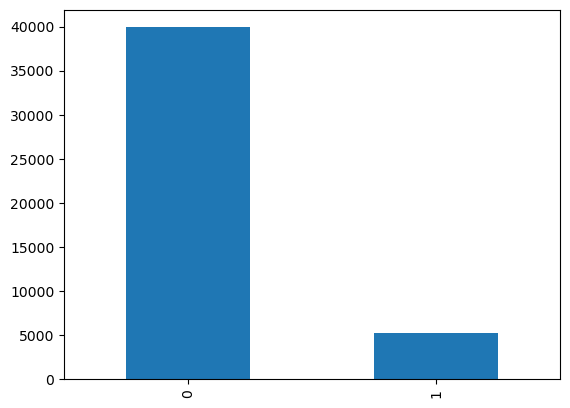

In [44]:
df['target'].value_counts().plot(kind = 'bar')

In [45]:
# unbalancing data
y.value_counts()

0    39922
1     5289
Name: target, dtype: int64

In [46]:
df_new = df[np.isfinite(df).all(1)]

In [47]:
x = df_new.drop(['target'],axis=1)
y = df_new['target']

In [48]:
pip install imbalanced-learn

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)

In [51]:
print(x_sm.shape)

(70764, 10)


In [52]:
print(y_sm.shape)

(70764,)


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


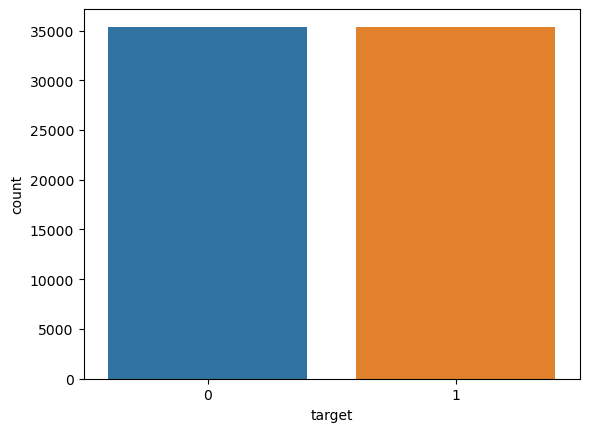

In [53]:
sns.countplot(y_sm)
plt.show()

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3)

In [55]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [56]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.7960945238432149
Precision : 0.8007401081696556
Recall : 0.7915025323579066


In [57]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[8468, 2100],
       [2223, 8439]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

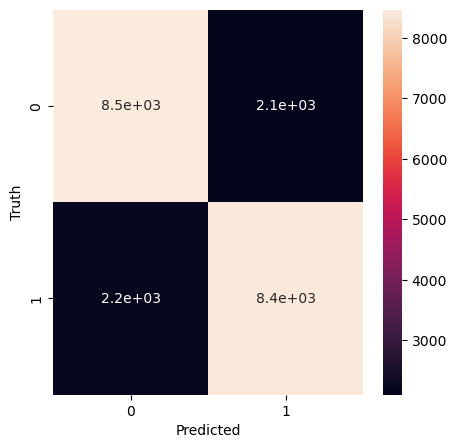

In [58]:
plt.figure(figsize = (5,5))
sns.heatmap(con_mat, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80     10568
           1       0.80      0.79      0.80     10662

    accuracy                           0.80     21230
   macro avg       0.80      0.80      0.80     21230
weighted avg       0.80      0.80      0.80     21230



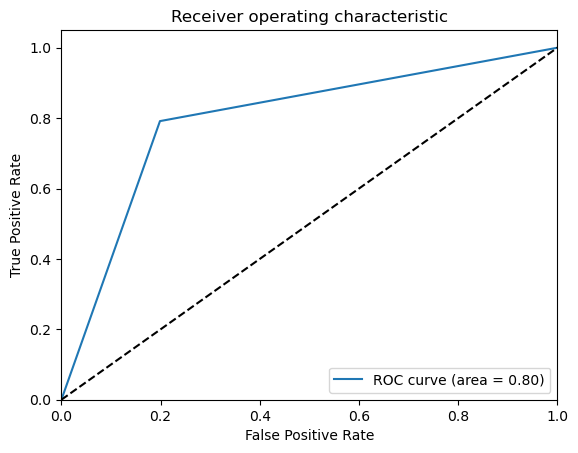

In [60]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [61]:
prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred.flatten()
})

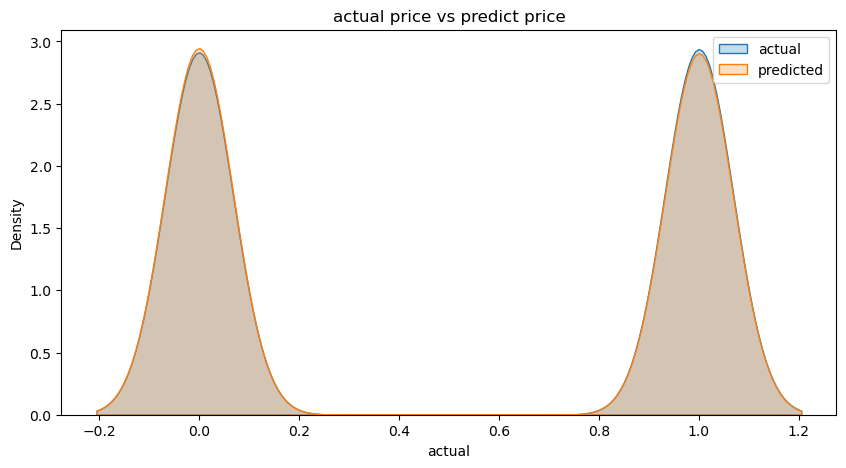

In [62]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=prediction,x = 'actual',label = 'actual',shade=True)
sns.kdeplot(data=prediction,x = 'predicted',label = 'predicted',shade=True)
plt.title('actual price vs predict price')
plt.legend()
plt.show()

# # Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
 
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.8904913789118476
Precision : 0.8779509616261052
Recall : 0.9033952354154943


In [64]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[9229, 1339],
       [1030, 9632]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

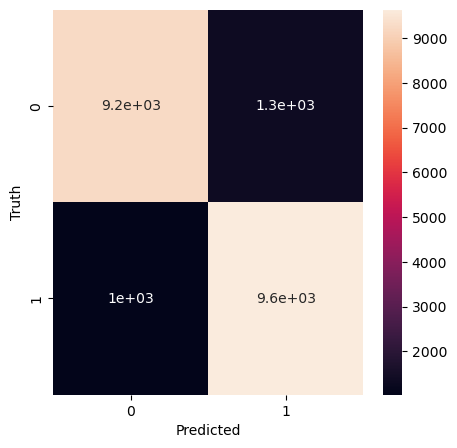

In [65]:
plt.figure(figsize = (5,5))
sns.heatmap(con_mat, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

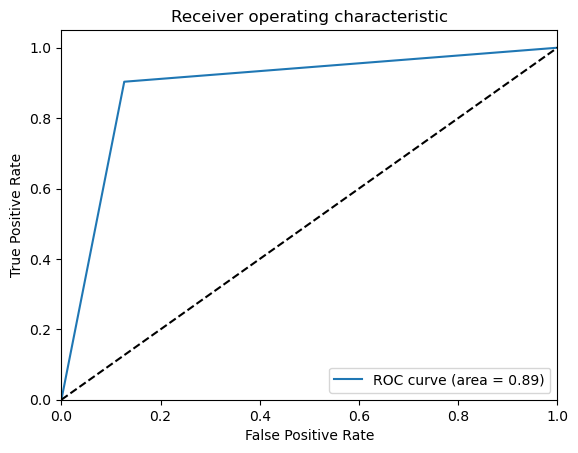

In [66]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [67]:
prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred.flatten()
})

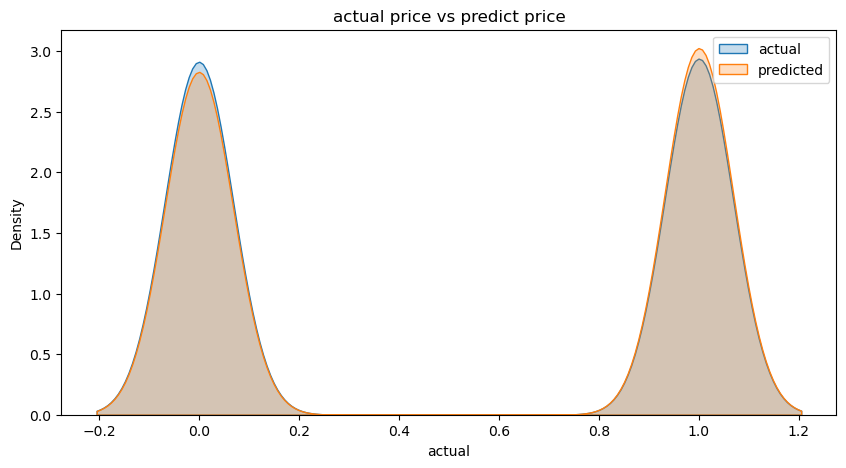

In [68]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=prediction,x = 'actual',label = 'actual',shade=True)
sns.kdeplot(data=prediction,x = 'predicted',label = 'predicted',shade=True)
plt.title('actual price vs predict price')
plt.legend()
plt.show()

# KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


F1 Score : 0.8717108258217245
Precision : 0.8469568294409059
Recall : 0.8979553554680173


In [70]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[8838, 1730],
       [1088, 9574]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

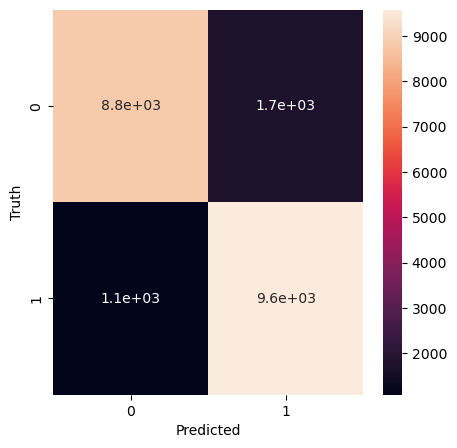

In [71]:
plt.figure(figsize = (5,5))
sns.heatmap(con_mat, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

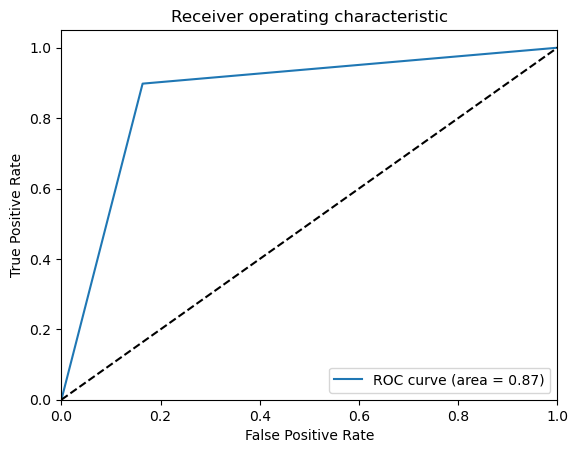

In [72]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [73]:
prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred.flatten()
})

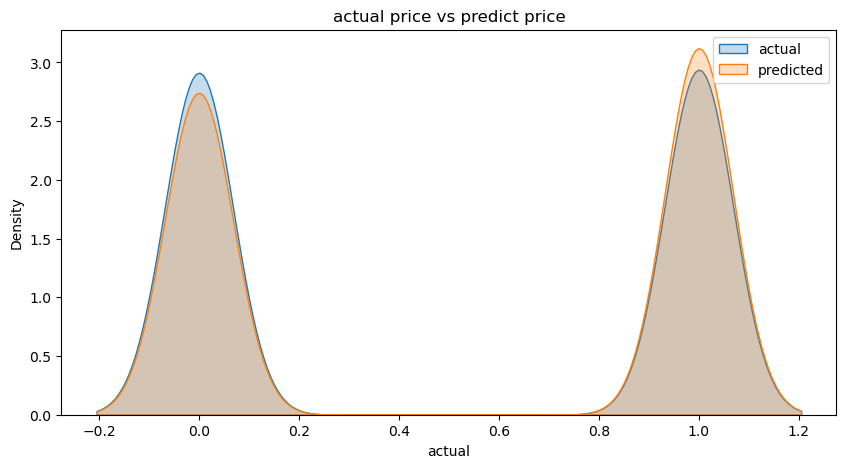

In [74]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=prediction,x = 'actual',label = 'actual',shade=True)
sns.kdeplot(data=prediction,x = 'predicted',label = 'predicted',shade=True)
plt.title('actual price vs predict price')
plt.legend()
plt.show()

# RandomForestClassifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.9218361139275509
Precision : 0.9062160202972092
Recall : 0.9380041268054774


In [76]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[ 9533,  1035],
       [  661, 10001]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

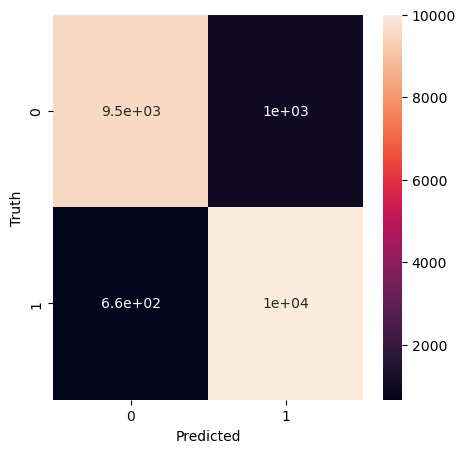

In [77]:
plt.figure(figsize = (5,5))
sns.heatmap(con_mat, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

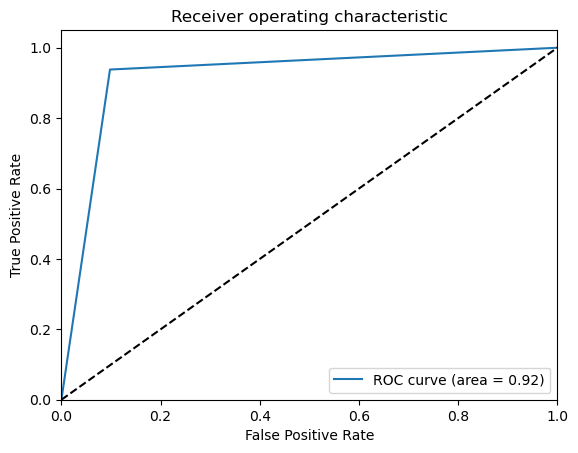

In [78]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [79]:
prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred.flatten()
})

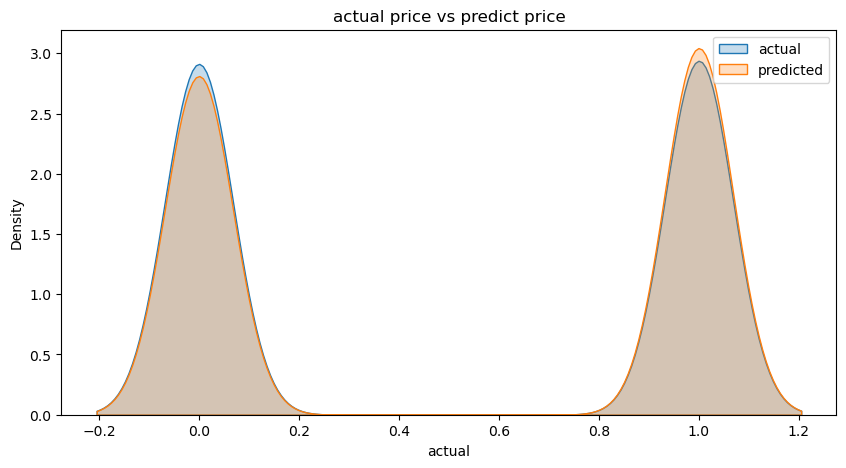

In [80]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=prediction,x = 'actual',label = 'actual',shade=True)
sns.kdeplot(data=prediction,x = 'predicted',label = 'predicted',shade=True)
plt.title('actual price vs predict price')
plt.legend()
plt.show()

#  Gradient Boost

In [81]:

from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.8905380333951763
Precision : 0.880895577170123
Recall : 0.9003939223410242


In [82]:
prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred.flatten()
})

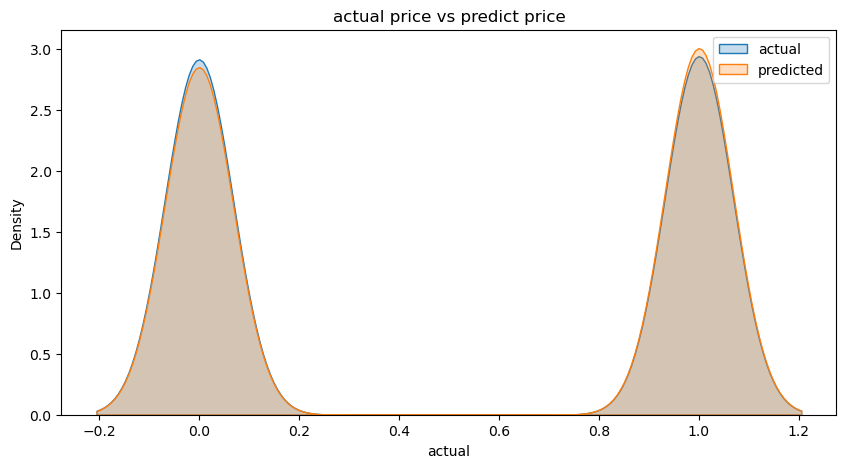

In [83]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=prediction,x = 'actual',label = 'actual',shade=True)
sns.kdeplot(data=prediction,x = 'predicted',label = 'predicted',shade=True)
plt.title('actual price vs predict price')
plt.legend()
plt.show()

In [84]:
regressor_result = pd.DataFrame({'Model':['LR','DT','RF','KNN','GBR'],
             'F1_score':[79,89,92,86,88]})

In [85]:
regressor_result

,Model,F1_score
0,LR,79
1,DT,89
2,RF,92
3,KNN,86
4,GBR,88


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='F1_score'>

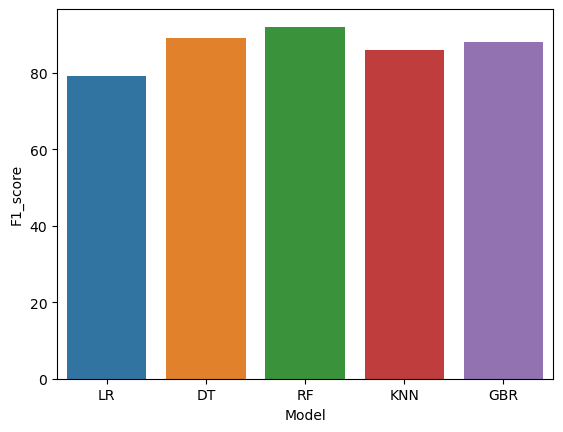

In [86]:
sns.barplot(regressor_result['Model'],regressor_result['F1_score'])

In [87]:
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [88]:
y_pred.flatten()

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

# conclusion

In [ ]:


Based on the performance evaluationof various machine learning models on the given dataset,the following conclusions can be gleaned:
    RandomForestClassifier (RFC) demonstrates the highest accuracy of 92%
    DecisionTree and GradientBoost achieve competitive accuracies of 89% 